# Modelling dengan LSA

Latent Semantic Analysis (LSA) merupakan sebuah metode yang memanfaatkan model statistik matematis untuk menganalisa struktur semantik suatu teks. LSA bisa digunakan untuk menilai esai dengan mengkonversikan esai menjadi matriks-matriks yang diberi nilai pada masing-masing term untuk dicari kesamaan dengan term referensi. Secara umum, langkah-langkah LSA dalam penilaian esai adalah sebagai berikut:

## Import Library

In [1]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize

#preprocessing
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet

# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

#stop-words
stop_words=set(nltk.corpus.stopwords.words('english'))

## Loading Dataset

In [2]:
df = pd.read_csv("TextPreprocessing.csv", usecols=["deskripsi"])

In [3]:
df.head()

,deskripsi
0,inggris larang impor produk kesehatan xinjiang...
1,tempoco ramadan tak hanya indonesia negara ini...
2,tumbuh persen amar bank salurkan pinjaman rp ...
3,kiat menjaga kesehatan hati reporter bisniscom...
4,pesenam kelahiran new york tetap tak boleh ber...


In [4]:
df.head(10)

,deskripsi
0,inggris larang impor produk kesehatan xinjiang...
1,tempoco ramadan tak hanya indonesia negara ini...
2,tumbuh persen amar bank salurkan pinjaman rp ...
3,kiat menjaga kesehatan hati reporter bisniscom...
4,pesenam kelahiran new york tetap tak boleh ber...
5,bursa transfer liga rans cilegon fc kembali da...
6,siaran tv analog dihentikan april kominfo taha...
7,kualifikasi formula emilia romagna verstappen ...
8,bursa transfer liga psis semarang dapatkan pem...
9,gempa terkini di sulawesi tengah giliran morow...


## Latent Semantic Analysis (LSA)

Singular Value Decomposition (SVD) adalah salah satu teknik reduksi dimensi yang bermanfaat untuk memperkecil nilai kompleksitas dalam pemrosesan term-document matrix. SVD merupakan teorema aljabar linier yang menyebutkan bahwa persegi panjang dari term-document matrix dapat dipecah/didekomposisikan menjadi tiga matriks, yaitu :

    - Matriks ortogonal U
    - Matriks diagonal S
    - Transpose dari matriks ortogonal V
Yang dirumuskan dengan :
$A_{mn} = U_{mm} \times S_{mn} \times V_{nn}^{T}$

$A_{mn}$ = matriks awal

$U_{mm}$ = matriks ortogonal U

$S_{mn}$ = matriks diagonal s

$V_{nn}^{T}$ = transpose matriks ortogonal v

In [5]:
from sklearn.decomposition import TruncatedSVD
lsa_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)
vect=TfidfVectorizer(stop_words=stop_words,max_features=1000)
vect_text=vect.fit_transform(df['deskripsi'])
lsa_top=lsa_model.fit_transform(vect_text)


In [6]:
print(lsa_top)
print(lsa_top.shape)  # (no_of_doc*no_of_topics)

[[ 0.44246597 -0.05170996 -0.20169801 -0.28317528 -0.00783806  0.04909038
  -0.04062387  0.25735175 -0.23806626 -0.13277994]
 [ 0.43834268 -0.01483974 -0.26760943  0.04184514 -0.25218383 -0.36419608
   0.14307254 -0.10902938  0.16825659 -0.00868517]
 [ 0.24292104  0.08217825 -0.28315927  0.52872096 -0.02739613  0.45285055
  -0.020461    0.05261666 -0.04663431  0.16005786]
 [ 0.35457706 -0.0551464  -0.21694956 -0.28766721  0.14532066  0.21002176
   0.20902009  0.22368978 -0.19391787 -0.26777921]
 [ 0.30787958  0.02895696 -0.21166957 -0.25600217 -0.12710546  0.132557
  -0.45101321 -0.2384806  -0.13992888  0.00296068]
 [ 0.26639684  0.69285617  0.16963238  0.09609313  0.10021745 -0.01081079
   0.1316889  -0.07574922 -0.17049884 -0.14253969]
 [ 0.34882707 -0.11409444  0.11444984  0.11679567 -0.1365982   0.02344264
  -0.27112742  0.37011553 -0.20367929 -0.29926827]
 [ 0.39792754  0.09482178  0.09811501 -0.2101082  -0.16634977  0.20160601
  -0.03655259 -0.33012514  0.24504065  0.11341437]
 [

In [7]:
l=lsa_top[0]
print("Document 0 :")
for i,topic in enumerate(l):
  print("Topic ",i," : ",topic*100)
  


Document 0 :
Topic  0  :  44.246596604769756
Topic  1  :  -5.170995919999537
Topic  2  :  -20.16980149986444
Topic  3  :  -28.317527866218434
Topic  4  :  -0.7838064817234477
Topic  5  :  4.909037547612574
Topic  6  :  -4.062387100114588
Topic  7  :  25.735174955352846
Topic  8  :  -23.806625838609815
Topic  9  :  -13.277994386615799


In [8]:
print(lsa_model.components_.shape) # (no_of_topics*no_of_words)
print(lsa_model.components_)

(10, 1000)
[[ 0.0073628   0.040238    0.02293696 ...  0.02613302  0.01697828
   0.06184327]
 [-0.00940885 -0.0001586  -0.02780617 ... -0.02786706 -0.00498949
   0.00415615]
 [ 0.02084096 -0.01926479  0.0468113  ...  0.03530444 -0.00820356
  -0.00962801]
 ...
 [-0.00136181 -0.0485069  -0.00543261 ... -0.00965279 -0.00340132
  -0.09384638]
 [ 0.00253737  0.02409803 -0.00934085 ... -0.02668339 -0.01554184
   0.06053206]
 [-0.00282135  0.04958969 -0.00837633 ...  0.04445687 -0.00015123
   0.05842172]]


In [9]:
# most important words for each topic
vocab = vect.get_feature_names()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")
         

Topic 0: 
di dan yang untuk hujan akan ini dengan pada dari 

Topic 1: 
pemain liga psis fc musim fajar bursa rans baru cilegon 

Topic 2: 
hujan pukul bmkg gempa pemain laut hingga liga petir berawan 

Topic 3: 
bank amar bpk pinjaman jalur yogyakarta ketua rp mandiri mudik 

Topic 4: 
pengajar gempa platform siswa bisa yogyakarta jalur mahasiswa aplikasi baterai 

Topic 5: 
baterai bank amar pinjaman listrik motor hati yamaha rp daya 

Topic 6: 
bihalal halal baterai listrik motor hati edaran ppkm yamaha idul 

Topic 7: 
vs liga inggris hati tv jadwal juara siaran analog kominfo 

Topic 8: 
baterai jalur vs listrik motor yamaha yogyakarta mudik daya swap 

Topic 9: 
gempa vs bihalal halal dirasakan guncangan morowali terkini bank juara 



## Latent Dirichlet Allocation (LDA)  

In [10]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=42,max_iter=1) 
# n_components is the number of topics

In [11]:
lda_top=lda_model.fit_transform(vect_text)

In [12]:
print(lda_top.shape)  # (no_of_doc,no_of_topics)
print(lda_top)


(20, 10)
[[0.01032322 0.01032308 0.90709126 0.01032321 0.01032319 0.01032308
  0.01032351 0.0103232  0.01032302 0.01032323]
 [0.01072433 0.01072439 0.01072439 0.01072452 0.01072441 0.01072434
  0.90348067 0.01072431 0.01072434 0.0107243 ]
 [0.01372216 0.01372214 0.01372216 0.01372221 0.87650016 0.01372218
  0.01372206 0.01372236 0.01372229 0.01372228]
 [0.01115603 0.01115536 0.01115543 0.01115535 0.01115543 0.01115537
  0.01115539 0.01115535 0.89960094 0.01115536]
 [0.91078083 0.009913   0.00991311 0.00991299 0.00991311 0.00991311
  0.0099144  0.0099131  0.00991308 0.00991326]
 [0.01299454 0.01299356 0.01299364 0.01299364 0.01299364 0.01299366
  0.01299356 0.01299359 0.01299366 0.88305651]
 [0.01193168 0.01193168 0.0119314  0.0119315  0.01193141 0.01193141
  0.01193145 0.01193136 0.89261651 0.01193161]
 [0.0088771  0.00887703 0.0088771  0.00887701 0.00887713 0.00887704
  0.0088771  0.9201061  0.0088771  0.00887729]
 [0.01266568 0.01266549 0.01266568 0.01266567 0.01266566 0.01266573
  0

In [13]:
sum=0
for i in lda_top[0]:
  sum=sum+i
print(sum)  

1.0


Perhatikan bahwa nilai dalam baris tertentu ditambahkan ke 1. Ini karena setiap nilai menunjukkan % kontribusi topik terkait dalam dokumen.

In [14]:
# composition of doc 0 for eg
print("Document 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  1.0323224683850167 %
Topic  1 :  1.032307504454671 %
Topic  2 :  90.70912634927686 %
Topic  3 :  1.0323205782698202 %
Topic  4 :  1.0323194720162474 %
Topic  5 :  1.0323076514533123 %
Topic  6 :  1.0323511454775984 %
Topic  7 :  1.0323200383865658 %
Topic  8 :  1.0323017599576698 %
Topic  9 :  1.0323230323222345 %


In [15]:
print(lda_model.components_)
print(lda_model.components_.shape)  # (no_of_topics*no_of_words)

[[0.8703105  0.85434455 0.81044014 ... 0.93537146 0.75631191 0.91473369]
 [0.91109682 0.88051115 0.62901973 ... 0.84263822 0.87510869 1.05082216]
 [0.68888338 0.82668677 0.88243706 ... 0.9336661  0.77714279 0.80835138]
 ...
 [0.75684535 0.91820279 0.85334298 ... 0.79899823 0.6764335  0.81364785]
 [0.9376118  0.76222521 0.80687708 ... 0.88485635 0.79560354 0.81234631]
 [0.75327363 0.76478809 0.96002918 ... 0.87954728 0.69845729 0.72556003]]
(10, 1000)


Kata-kata yang paling penting untuk suatu topik. (10 kali)

In [16]:
# most important words for each topic
vocab = vect.get_feature_names()

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
bila siswa tidak mendapat kesempatan resmi ujar switch tahun balapan 

Topic 1: 
penggemar lalu makanmakan ukraina guncangan lihat zendaya klimatologi diluncurkan ppkm 

Topic 2: 
belakang setiap ritmik ukrainarusia prancis bangkit sprint servicedengan pernah pendidikan 

Topic 3: 
tepatnya diprediksi nomor tingkat hidup perjalanan laga mengisi tak jalur 

Topic 4: 
olahan lap abang kawasan iii pertumbuhan mirip poin satu kelapa 

Topic 5: 
tumbuh diluncurkan takjil sendiri kontributor setiawan tingkat alternatif katanya mengikuti 

Topic 6: 
ramadan menentukan mempunyai memiliki risiko layanan platform tapi guncangan ujiajacommenerapkan 

Topic 7: 
bisa kliktempoco kerawanan sepanjang naik lama kasino pemerintah insiden sosial 

Topic 8: 
tampak keseluruhan ucapnya mendukung narendra rekam virtual diguyur membawa terkait 

Topic 9: 
terdapat baterai balik tentunya bidang empat kantor selasa ahad laut 



To better visualize words in a topic we can see the word cloud. For each topic top 50 words are plotted.

In [17]:
from wordcloud import WordCloud
# Generate a word cloud image for given topic
def draw_word_cloud(index):
  imp_words_topic=""
  comp=lda_model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()
 

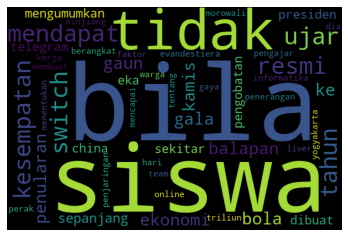

In [18]:
# topic 0
draw_word_cloud(0)

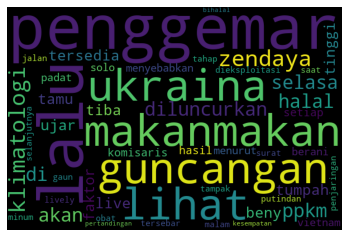

In [19]:
# topic 1
draw_word_cloud(1)  # ...